# Data Analytics Fundamentals 1st Summative Assessment

Having set up a project with a virtual environment, upgrade pip and install pandas.

```python -m pip install --upgrade pip```

```pip --version```

```pip install pandas matplotlib seaborn```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

print("Pandas version:", pd.__version__)


In [15]:
cc = pd.read_csv("data/customerChurnData.csv")
cc.describe()

,Tenure,LocalCalls,LocalMins,IntlCalls,IntlMins,ExtraInternationalCharges,CustomerServiceCalls,AvgMonthlyGBDownload,ExtraDataCharges,Age,NrCustomers,MonthlyCharges,TotalCharges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [12]:
cc.head()

,CustomerID,Churn,Tenure,LocalCalls,LocalMins,IntlCalls,IntlMins,IntlActive,IntlPlan,ExtraInternationalCharges,...,Age,Under30,Senior,Group,NrCustomers,DeviceProtection&OnlineBackup,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


### 1. What is the average age of customers who have not churned? (Rounded)

Get only rows where "Churn" == "No"

In [8]:
not_churned = cc[cc["Churn"] == "No"]


Get the average age of this df

In [9]:
ave_age_not_churned = not_churned["Age"].mean()
ave_age_not_churned # => 46.34307912492333

np.float64(46.34307912492333)

In [11]:
print(f"Average rounded age of customers who have not churned is {round(ave_age_not_churned)}") # => 46

Average age of customers who have not churned is 46


### 2. What percentage of customers have an International Plan?

Find the total number of customers and the number who have an international plan

In [17]:

num_customers = cc.shape[0]
print(f"There are {num_customers} customers in total")


There are 6687 customers in total


In [16]:
has_intl_plan = cc[cc["IntlPlan"] == "yes"]
num_with_intl_plan = has_intl_plan.shape[0]
print(f"{num_with_intl_plan} customers have an international plan")


651 customers have an international plan


Extrapolate the percentage

In [21]:
per_with_intl_plan = (num_with_intl_plan / num_customers) * 100
print(f"{per_with_intl_plan:.2f}% of customers have an international plan")

9.74% of customers have an international plan


### 3. What is the median monthly charges for all customers?

In [23]:
cc["MonthlyCharges"].dtype

dtype('int64')

In [26]:
median_monthly_charge = cc["MonthlyCharges"].median()
print(f"The median monthly charge for all customers is {median_monthly_charge}")

The median monthly charge for all customers is 31.0


### 4. Generate a bar chart showing the count of customers who churned vs. those who did not. Which group is larger?

In [30]:
churn_counts = cc["Churn"].value_counts()
churn_counts


Churn
No     4891
Yes    1796
Name: count, dtype: int64

<Axes: xlabel='Churn'>

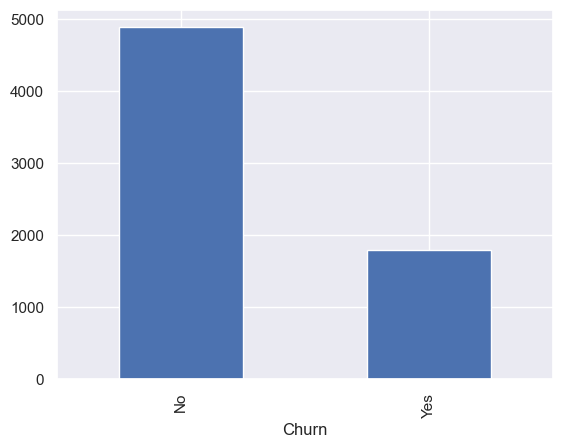

In [31]:
churn_counts.plot(kind="bar")


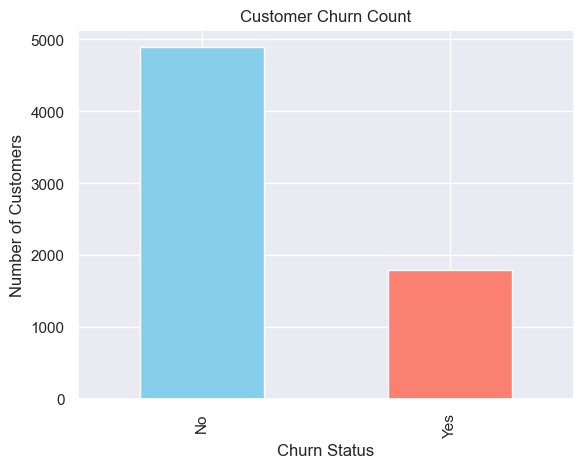

In [32]:
churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

The group that did not churn ("No") is the larger group

### 5. What is the average number of customer service calls for customers who churned?

First, we get a df for customers who churned

In [34]:
churners = cc[cc["Churn"] == "Yes"]
churners["Churn"].value_counts()

Churn
Yes    1796
Name: count, dtype: int64

Then get the mean number of service calls for that group

In [36]:
ave_serv_calls = churners["CustomerServiceCalls"].mean()
print(f"The average number of service calls for customers who churned is {ave_serv_calls:.2f}")

The average number of service calls for customers who churned is 2.40


### 6. Create a histogram - What is the most common tenure range shown in the histogram?

In [37]:
cc["Tenure"].dtype

dtype('int64')

In [57]:
tenure = cc["Tenure"]
print(f"Tenures range between {tenure.min()} and {tenure.max()} months")

Tenures range between 1 and 77 months


In [55]:
tenure_bin = 77

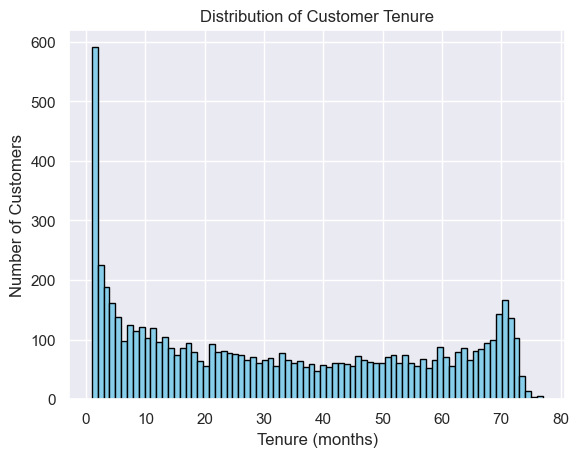

In [56]:
cc["Tenure"].plot(kind="hist", bins=tenure_bin, color="skyblue", edgecolor="black")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


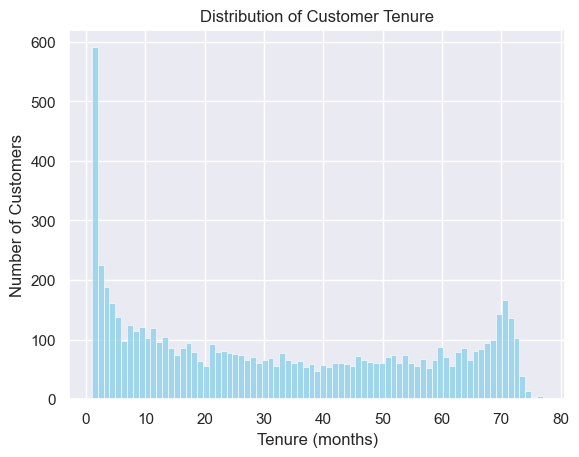

In [58]:
import seaborn as sns
sns.histplot(cc["Tenure"], bins=tenure_bin, kde=False, color="skyblue")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()
